## The Chandrasekhar mass limit for the white-dwarf models with $T=0$ (ASTR 404)

The structure of a non-rotating spherically symmetric star is determined by the equation of hydrostatic equilibrium

$$
\frac{dP}{dr} = -g\rho,
$$

where $P$ and $\rho$ are the pressure and density,
$g=\frac{d\varphi}{dr}=\frac{GM_r}{r^2}$ is the gravitational acceleration on the surface of a sphere of the radius $r$ and mass

$$
M_r = \int_0^r 4\pi r^2\rho dr,
$$

and $\varphi$ is the gravitational potential on the sphere.

For a known distribution of gas particle's momentum $n(p)$, the pressure is given by the following integral:

$$
P = \frac{1}{3}\int_0^\infty\frac{dn(p)}{dp}v(p)pdp,
$$

where $v=\frac{dE(p)}{dp}$ is particle's velocity expressed via its energy $E(p)=\sqrt{m^2c^4+p^2c^2}$.

White dwarfs are the stars in which the hydrostatic equilibrium is supported by the pressure of electron-degenerate gas. The zero-temperature assumption means that in their phase space electrons must occupy all available states with the minimum possible energy $E(p)\leq E(p_0)$. This simplifies the computation of their equation of state that is now defined by
the Pauli exclusion and Heisenberg's uncertainty principles. According to them, only two electrons with opposite
spins can occupy the elementary cell of the phase space $h^3$. Therefore, the number of electrons $dN(p)$ with momenta
between $p$ and $p+dp$ inside a volume $V$ that can be combined in pairs with opposite spins and placed in the elementary cells is
$$
dN(p) = 2\frac{4\pi p^2dp V}{h^3},
$$
which gives
$$
\frac{dn(p)}{dp} = \frac{1}{V}\frac{dN(p)}{dp} = \frac{8\pi p^2}{h^3}.
$$

The pressure of the electron-degenerate gas at $T=0$ is therefore 
$$
P = \frac{8\pi}{3h^3}\int_0^{p_0}\frac{dE(p)}{dp}p^3dp,
$$

where $p_0$ is the Fermi momentum that is constrained by the electron number density

$$
n = \frac{8\pi}{h^3}\int_0^{p_0} p^2dp = \frac{8\pi}{3h^3}{p_0}^3.
$$

The latter is related to the mass density as $\rho = \mu_\mathrm{e}M_\mathrm{u}n$, where
$\mu_\mathrm{e} = (\Sigma\,X_i\frac{Z_i}{A_i})^{-1}$ is the electron mean molecular weight and $M_\mathrm{u}$ is the atomic mass unit, with $X_i$, $Z_i$, and $A_i$ being the mass fraction, atomic number and mass number of the i-th nucleus.
For a CO white dwarf, $\mu_\mathrm{e} = 2$.

### This information is sufficient to estimate one of the most important quantity in the stellar astrophysics - the Chandrasekhar mass limit for white dwarfs, $M_\mathrm{Ch}$.

In [1]:
from __future__ import division
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

# physical constants
import scipy.constants as sc

from scipy.integrate import odeint
from scipy import interpolate

# astronomical constants
from astropy import constants as ac

fsize=16
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'

init_printing()

In [2]:
# x - dimensionless Fermi momentum
# p - momentum of an electron
# E - energy
# v = dE/dp - velocity
# P - pressure
# n - electron number density
# m - mass of electron
# c - the speed of light in vacuum
# h - Planck constant
# p0 - Fermi momentun of electrons
# mue - electron mean molecular weight
# NA - Avogadro's number
# AMU - atomic mass unit
x, p, E, v, P, n, m, c, h, p0, mue, G, NA, AMU = symbols('x p E v P n m c h p0 mue G NA AMU')

In [3]:
E=sqrt(p**2*c**2+m**2*c**4)
print ("The electron energy:")
E

The electron energy:


The electron velocity:


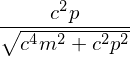

In [4]:
v=diff(E,p)
print ("The electron velocity:")
v

The electron pressure integral:


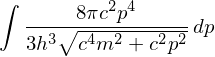

In [5]:
f=(8*pi/(3*h**3))*v*p**3
P_int=Integral(f,p)
print ("The electron pressure integral:")
P_int

This integral has to be taken from 0 to $p_0$.
From its expression, it follows that $\frac{dP}{dx} = \frac{8\pi}{3}\frac{mc^2}{\lambda^3}\frac{x^4}{\sqrt{1+x^2}}$, where
$x=\frac{p_0}{mc}$ is the dimensionless Fermi momentum and $\lambda = \frac{h}{mc}$ is the De Broglie wavelength of
ultra-relativistic electrons.

The integrated pressure as a function of p0:


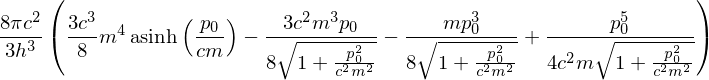

In [6]:
print ("The integrated pressure as a function of p0:")
P=integrate(f,(p,0,p0))
P

The integrated pressure as a function of x:


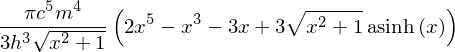

In [7]:
# x=p0/(m*c) is the relativization parameter
print ("The integrated pressure as a function of x:")
Px=simplify(P.subs(p0,c*m*x))
Px

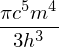

In [8]:
A=(pi/3)*(c**5*m**4)/h**3
A

In [9]:
A0=(A.subs({c:sc.c, m:sc.m_e, h:sc.h})).evalf()
print ("A0=",A0)

('A0=', 6.00233211164895e+21)


### In fact, we don't even need to know the pressure in order to find the Chandrasekhar mass limit. It is sufficient to know the pressure derivative with respect to the Fermi momentun that we have already found.

The electron number density integral:


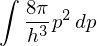

In [10]:
f=(8*pi/(h**3))*p**2
n_int=Integral(f,p)
print ("The electron number density integral:")
n_int

The integrated electron number density:


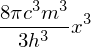

In [11]:
print ("The integrated electron number density:")
n_int=integrate(f,(p,0,p0))
nx=n_int.subs(p0,c*m*x)
nx

The integrated mass density:


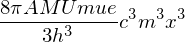

In [12]:
print ("The integrated mass density:")
nrho=nx*mue*AMU
nrho

So, the mass density is $\rho = \frac{8\pi}{3}\frac{\mu_\mathrm{e}M_\mathrm{u}}{\lambda^3}x^3 = B_0\mu_\mathrm{e}x^3$, 
where $M_\mathrm{e} = N_\mathrm{A}^{-1}$ is the atomic mass unit (AMU) in grams.

When calculating the AMU, the Avogadro number has to be multiplied by 1000 to transform grams to kilograms


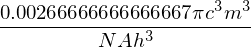

In [13]:
print ("When calculating the AMU, the Avogadro number has to be multiplied by 1000 to transform grams to kilograms")
B=(8*pi/3)*(m*c/h)**3/(1e3*NA)
B

In [14]:
B0=(B.subs({c:sc.c, m:sc.m_e, h:sc.h, NA:sc.N_A})).evalf()
print ("B0=",B0)

('B0=', 973932154.441296)


## The Chandrasekhar differential equation

The hydrostatic equilibrium equation can be written as

$$
\frac{dP(x)}{dr} = \frac{dP}{dx}\frac{dx}{dr} = -\rho \frac{d\varphi}{dr}.
$$

In the spherically symmetric case, the gravitational potential obeys the following (Poisson's) equation:

$$
\Delta \varphi = \frac{1}{r^2}\frac{d}{dr}\left(r^2\frac{d\varphi}{dr}\right) = 4\pi G\rho.
$$

After substituting the expressions for $\frac{dP}{dx}$ and $\rho(x)$ into Poisson's equation, it becomes

$$
\frac{1}{r^2}\frac{d}{dr}\left(r^2\frac{d\sqrt{1+x^2}}{dr}\right) = - \frac{8\pi}{3}\frac{(\mu_\mathrm{e}M_\mathrm{u})^2}{mc^2}
\frac{4\pi G}{\lambda^3} x^3.
$$
Introducing the Chandrasekhar function $y=\frac{\sqrt{1+x}}{y_0}$ and the dimensionless radius $\xi = \frac{r}{l_0}$, where

$$
l_0 = \frac{1}{y_0}\left[\left(\frac{3}{8\pi}\right)\frac{mc^2\lambda^3}{4\pi G (\mu_\mathrm{e}M_\mathrm{u})^2}\right]^{1/2},
$$

we derive the white-dwarf structure equation

$$
\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2\frac{dy}{d\xi}\right) = -\left(y^2-\frac{1}{y_0^2}\right)^{3/2}
$$

that has to be solved for the initial conditions $y(0)=1$ and $y'(0)=0$. This is a one-parameteric equation with

$$
y_0^2 = 1 + \left(\frac{\rho_\mathrm{c}}{B_0\mu_\mathrm{e}}\right)^{2/3},
$$

where $\rho_\mathrm{c}$ is the central density. In the Chandrasekhar (ultra-relativistic) limit 
$\rho_\mathrm{c}\to\infty$.

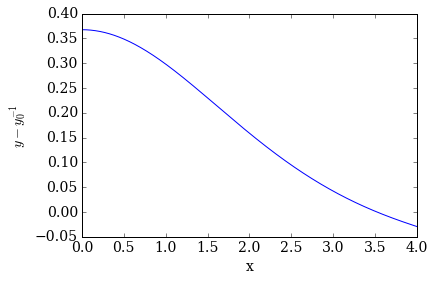

In [27]:
# solution of the above second order ODE for y:

y02=0.4 # 1e-10 # 1/y0**2 a small y02 corresponds to ultra-relativistic limit
y0=np.sqrt(y02)

def g(y, x):
    y0 = y[0]
    y1 = y[1]
    y2 = -2*y1/x - (abs(y0**2-y02))**1.5
    return y1, y2

# Initial conditions on y, y' at x=0
init = 1.0, 0.0

# First integrate from 0 to 2
x0=1.0
y00=1.0
while y00 > y0:  
    x0=2.0*x0
    x = np.linspace(1e-20,x0,1000)
    sol=odeint(g, init, x)
    y00=sol[-1,0]
    
plt.plot(x, sol[:,0]-y0, color='b')
plt.xlabel("x")
plt.ylabel("$y - y_0^{-1}$")
plt.show()

In [28]:
# We interpolate the solution to find its and its derivative's values at the surface
f = interpolate.interp1d(sol[:,0]-y0,x)
g = interpolate.interp1d(x,sol[:,1])
print (f(0)) 
print (sol[-1,0]-y0) 
print (-f(0)**2*g(f(0)))

3.52447551754
-0.029184753615
0.859803375884


The white-dwarf mass is $M = \int_0^R 4\pi r^2\rho dr$. Using a solution of the differential equation, the mass can be presented as

$$
M = \frac{4\pi B_0 L_0}{\mu_\mathrm{e}^2}\left[-\xi^2 y'(\xi)\right],
$$

where the coefficient $B_0$ has already been calculated, and $L_0$ is calculated now.

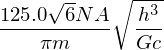

In [29]:
# Don't forget to multiply NA by 1e3 to transform grams to kilograms
L = sqrt(3*h**3/(2*c*G))*(1e3*NA)/(4*pi*m)
L

In [30]:
L0=(L.subs({NA:sc.N_A, h:sc.h, c:sc.c, G:sc.G, m:sc.m_e})).evalf()
L0

In [31]:
R=y0*L0*f(0)/ac.R_sun.value
print ("The radius (in solar units) for the white-dwarf model with T=0 K is")
print ("R = ",R)

The radius (in solar units) for the white-dwarf model with T=0 K is
('R = ', 0.0248930524548743)


In [32]:
mu1=-f(0)**2*g(f(0))
mue=2.0 # for a CO WD
M=4*pi*B0*L0**3/mue**2*mu1
print ("The Chandrasekhar mass limit (in solar masses) for the white-dwarf model with T=0 K is")
print ("MCh = ",M.evalf()/ac.M_sun.value)

The Chandrasekhar mass limit (in solar masses) for the white-dwarf model with T=0 K is
('MCh = ', 0.620418141704783)


### Use solutions of the above differential equation to plot the mass-radius relation for the zero-T white dwarfs.